In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from mpl_toolkits import mplot3d
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [2]:
%matplotlib inline  

In [3]:
def find_num_right(f, labels):
    num_right = 0
    looking = f - labels
    for i in range(len(f)):
        if abs(looking[i]) == 0:
            num_right += 1
    return num_right / len(f)

C:\Users\16kat\OneDrive\Documents\Spring 2020\AMATH 563
C:\Users\16kat\OneDrive\Documents\Spring 2020\AMATH 563\CroppedYale
(2432, 32256)
(2432,)


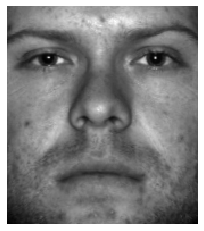

36055
8937
37


In [40]:

script_dir = os.path.dirname(os.path.realpath('__file__')) #<-- absolute dir the script is in
print(script_dir)
rel_path = "CroppedYale"
abs_file_path = os.path.join(script_dir, rel_path)

print(abs_file_path)
faces = []
labels = []
# this_faces = []
# other_faces = []
this_one = -1
for fname in os.listdir(abs_file_path):
    this_one += 1
#         this_one = False
    for fname2 in os.listdir(os.path.join(script_dir, rel_path, fname)):
        img = np.array(Image.open(os.path.join(script_dir, rel_path, fname, fname2)))
        faces.append((img.T).reshape(192*168))
        labels.append(this_one)

        
        
# print(np.array(cropped_faces).shape)
faces = np.array(faces)
labels = np.array(labels)
print(faces.shape)
print(labels.shape)
# print(cropped_faces.shape)



face = np.reshape(faces[0,:],(168,192)).T
img = plt.imshow(face)
img.set_cmap('gray')
plt.axis('off')
plt.show()

#break up a testing and training set
x_train,x_test,y_train,y_test=train_test_split(faces,labels,test_size=0.2)

print(sum(y_train))
print(sum(y_test))

print(this_one)

In [33]:
#Using A/b to predict male and female
labels_seperate_train = np.zeros([len(y_train), max(y_train)+1])
print(labels_seperate_train.shape)
# print(labels[1][1])
for i in range(len(y_train)):
        index = int(y_train[i])
#         print(index)
        labels_seperate_train[i,index] = 1

    
labels_seperate_test = np.zeros([len(y_test), max(y_test)+1])
print(labels_seperate_test.shape)
# print(labels[1][1])
for i in range(len(y_test)):
        index = int(y_test[i])
#         print(index)
        labels_seperate_test[i,index] = 1
# print(sum(sum(labels_seperate_test)))
def find_results(data, x):
    #Takes the data and the x results of a fit and finds the predicted results 
    # along with the predicted results maximized by each column
    f = np.matmul(data, x)
    f_max = np.zeros(f.shape)
    for i in range(len(data)):
        f_max[i, np.argmax(f[i])] = 1
    return f, f_max

def find_error(data, labels, x):
    #finds the error in the results and the maximized results.
    f, f_max = find_results(data, x)
    f_error = np.linalg.norm(labels - f, ord=2)/np.linalg.norm(labels, ord=2)
    f_max_error = np.linalg.norm(labels - f_max, ord=2)/np.linalg.norm(labels, ord=2)
    return f_error, f_max_error

def find_num_right_seperate(x, data, labels):
    f,f_max = find_results(data, x)
    num_right = 0
    looking = f_max - labels
    for i in range(len(f)):
#         print(looking[i])
        if max(abs(looking [i])) == 0:
            num_right += 1
    return num_right/len(f)

tup = np.linalg.lstsq(x_train, labels_seperate_train)
x = tup[0]
f = np.matmul(x_train, x)
# max_f = np.zeros(f.shape)
# for i in range(len(f)):
#     if f[i] > 0.5:
#         max_f[i] = 1
        
# print(sum(max_f))
# error = np.linalg.norm(labels_seperate_train - max_f, ord=2)/np.linalg.norm(labels_seperate_train, ord=2)
# print("Training error using least squares = ", error)
print("Training Accuracy using Least Squares = ", find_num_right_seperate(x, x_train, labels_seperate_train))

# f_test = np.matmul(x_test, x)
# max_f_test = np.zeros(f_test.shape)
# for i in range(len(f_test)):
#     if f_test[i] > 0.5:
#         max_f_test[i] = 1
        
# error_test = np.linalg.norm(y_test - max_f_test, ord=2)/np.linalg.norm(y_test, ord=2)
# print("Testing error using Least squares = ", error_test)
print("Testing Accuracy using Least Squares = ", find_num_right_seperate(x, x_test, labels_seperate_test))



(1945, 38)
(487, 38)
Training Accuracy using Least Squares =  0.9994858611825193
Testing Accuracy using Least Squares =  0.8809034907597536


In [37]:
#Using lasso to predict male and female

clf = linear_model.Lasso(alpha=1)
clf.fit(x_train, labels_seperate_train)
x = clf.coef_
x = np.transpose(x)
print("Training Accuracy using Lasso = ", find_num_right_seperate(x, x_train, labels_seperate_train))

print("Testing Accuracy using Lasso = ", find_num_right_seperate(x, x_test, labels_seperate_test))



Training Accuracy using Lasso =  0.3557840616966581
Testing Accuracy using Lasso =  0.3080082135523614


In [7]:
#k nearest neighbors
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)


max_f = neigh.predict(x_train)
# print(sum(max_f))
error = np.linalg.norm(y_train - max_f, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using knn = ", error)
print("Training Accuracy using knn = ", find_num_right(max_f, y_train))

# f_test = np.matmul(x_test, x)
max_f_test = neigh.predict(x_test)
        
error_test = np.linalg.norm(y_test - max_f_test, ord=2)/np.linalg.norm(y_test, ord=2)
print("Testing error using knn = ", error_test)
print("Testing Accuracy using knn = ", find_num_right(max_f_test, y_test))


Training error using knn =  0.2850012174516246
Training Accuracy using knn =  0.8560411311053985
Testing error using knn =  0.4105686172141853
Testing Accuracy using knn =  0.6509240246406571


In [8]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_train)
y_test_pred = gnb.predict(x_test)

error = np.linalg.norm(y_train - y_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using Navie Bayes = ", error)
print("Training Accuracy using Navie Bayes = ", find_num_right(y_pred, y_train))

error_test = np.linalg.norm(y_test - y_test_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Testing error using Navie Bayes = ", error_test)
print("Testing Accuracy using Navie Bayes = ", find_num_right(y_test_pred, y_test))

Training error using Navie Bayes =  0.4286221560887479
Training Accuracy using Navie Bayes =  0.7203084832904885
Testing error using Navie Bayes =  0.26986014328099617
Testing Accuracy using Navie Bayes =  0.5626283367556468


In [9]:
#LDA
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)
# LinearDiscriminantAnalysis()
y_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


error = np.linalg.norm(y_train - y_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using LDA = ", error)
print("Training Accuracy using LDA = ", find_num_right(y_pred, y_train))

error_test = np.linalg.norm(y_test - y_test_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Testing error using LDA = ", error_test)
print("Testing Accuracy using LDA = ", find_num_right(y_test_pred, y_test))

C:\Users\16kat\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Training error using LDA =  0.07305680414540106
Training Accuracy using LDA =  0.987146529562982
Testing error using LDA =  0.10440217656372419
Testing Accuracy using LDA =  0.9137577002053389


In [10]:
#Quadratic DA
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)
# LinearDiscriminantAnalysis()
y_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


error = np.linalg.norm(y_train - y_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using QDA = ", error)
print("Training Accuracy using QDA = ", find_num_right(y_pred, y_train))

error_test = np.linalg.norm(y_test - y_test_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Testing error using QDA = ", error_test)
print("Testing Accuracy using QDA = ", find_num_right(y_test_pred, y_test))

C:\Users\16kat\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Training error using QDA =  0.0
Training Accuracy using QDA =  1.0
Testing error using QDA =  0.3476174154003985
Testing Accuracy using QDA =  0.09856262833675565


In [15]:
# Mdl = svm.SVC(kernel='rbf',gamma='auto').fit(x_train,y_train)
y_pred = Mdl.predict(x_train)
y_test_pred = Mdl.predict(x_test)

error = np.linalg.norm(y_train - y_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using svm = ", error)
print("Training Accuracy using svm = ", find_num_right(y_pred, y_train))

error_test = np.linalg.norm(y_test - y_test_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Testing error using svm = ", error_test)
print("Testing Accuracy using svm = ", find_num_right(y_test_pred, y_test))

Training error using svm =  0.03001474353474069
Training Accuracy using svm =  0.9974293059125964
Testing error using svm =  0.25972933293699774
Testing Accuracy using svm =  0.01642710472279261


In [12]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

error = np.linalg.norm(y_train - y_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using Decision Tree = ", error)
print("Training Accuracy using Decision Tree = ", find_num_right(y_pred, y_train))

error_test = np.linalg.norm(y_test - y_test_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Testing error using Decision Tree = ", error_test)
print("Testing Accuracy using Decision Tree = ", find_num_right(y_test_pred, y_test))

Training error using Decision Tree =  0.0
Training Accuracy using Decision Tree =  1.0
Testing error using Decision Tree =  0.20640910036105375
Testing Accuracy using Decision Tree =  0.7453798767967146


(0, 1.1)

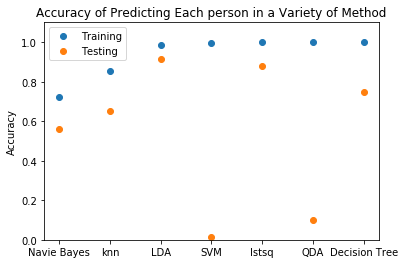

In [39]:
training = [0.8560411311053985, 0.7203084832904885, 0.987146529562982, 1.0, 0.9974293059125964, 1.0, 0.9994858611825193]
testing = [0.6509240246406571, 0.5626283367556468, 0.9137577002053389, 0.09856262833675565, 0.01642710472279261, 0.7453798767967146, \
          0.8809034907597536, ]
name = ["knn", "Navie Bayes", "LDA", "QDA", "SVM", "Decision Tree", "lstsq"]

inds = np.array(training).argsort()
training = np.array(training)[inds]
testing = np.array(testing)[inds]
name = np.array(name)[inds]

plt.xticks(range(len(training)), name)
plt.plot(range(len(training)), training, 'o')
plt.plot(range(len(testing)), testing, 'o')
plt.legend(["Training", "Testing"])
plt.ylabel("Accuracy")
plt.title("Accuracy of Predicting Each person in a Variety of Method")
plt.ylim([0,1.1])

(0, 1.1)

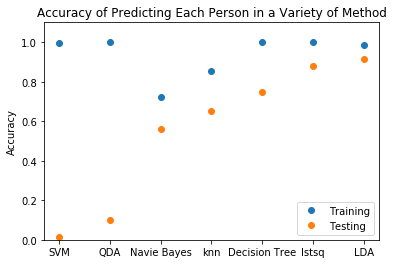

In [38]:
training = [0.8560411311053985, 0.7203084832904885, 0.987146529562982, 1.0, 0.9974293059125964, 1.0, 0.9994858611825193]
testing = [0.6509240246406571, 0.5626283367556468, 0.9137577002053389, 0.09856262833675565, 0.01642710472279261, 0.7453798767967146, \
          0.8809034907597536, ]
name = ["knn", "Navie Bayes", "LDA", "QDA", "SVM", "Decision Tree", "lstsq"]

inds = np.array(testing).argsort()
training = np.array(training)[inds]
testing = np.array(testing)[inds]
name = np.array(name)[inds]

plt.xticks(range(len(training)), name)
plt.plot(range(len(training)), training, 'o')
plt.plot(range(len(testing)), testing, 'o')
plt.legend(["Training", "Testing"])
plt.ylabel("Accuracy")
plt.title("Accuracy of Predicting Each Person in a Variety of Method")
plt.ylim([0,1.1])